# Import Libaries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Import Data

In [2]:
df = pd.read_excel(r"C:\Users\Absar\Desktop\cellphone_fiverr.xlsx")
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Partition
0,0,164,1,1,3.86,1,219.1,88,89.6,7.58,14.3,t
1,1,177,0,0,0.00,1,248.7,118,57.0,8.62,11.3,t
2,0,132,1,0,0.31,1,191.9,107,54.1,10.35,12.6,t
3,1,70,1,0,0.00,0,232.8,95,66.0,15.17,12.9,t
4,0,81,1,1,3.29,1,161.6,117,70.9,6.15,12.2,t


In [3]:
Partition_dummy = pd.get_dummies(df['Partition'])

In [4]:
df = pd.concat((df,Partition_dummy), axis=1)

In [5]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Partition,s,t,v
0,0,164,1,1,3.86,1,219.1,88,89.6,7.58,14.3,t,0,1,0
1,1,177,0,0,0.00,1,248.7,118,57.0,8.62,11.3,t,0,1,0
2,0,132,1,0,0.31,1,191.9,107,54.1,10.35,12.6,t,0,1,0
3,1,70,1,0,0.00,0,232.8,95,66.0,15.17,12.9,t,0,1,0
4,0,81,1,1,3.29,1,161.6,117,70.9,6.15,12.2,t,0,1,0


In [6]:
df.tail()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Partition,s,t,v
2146,0,201,1,0,0.24,1,212.7,72,58.4,11.26,7.0,s,1,0,0
2147,1,108,0,0,0.38,2,115.1,114,41.8,10.57,13.8,s,1,0,0
2148,0,70,1,0,0.31,0,177.4,125,53.1,11.31,10.9,s,1,0,0
2149,0,62,1,0,0.00,4,245.3,91,53.0,6.15,8.5,s,1,0,0
2150,0,81,1,0,0.00,1,154.5,84,45.0,10.81,13.7,s,1,0,0


In [7]:
df= df.drop(['Partition'], axis=1)

In [8]:
X = df.values
y = df['Churn'].values

In [9]:
X= np.delete(X,1, axis=1)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

# LogisticRegression

In [11]:
from sklearn.linear_model import LogisticRegression
lr_clf=LogisticRegression(solver='sag', max_iter=100, multi_class='multinomial', class_weight='balanced', fit_intercept=True)

In [12]:
lr_clf.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', multi_class='multinomial',
                   solver='sag')

In [13]:
lr_clf.score(X_test,y_test)

0.951276102088167

# Prediction Probabilities

In [27]:
r_probs= [0  for _ in range(len(y_test))]
lr_probs= lr_clf.predict_proba(X_test)

# Probabilities for the positive outcome is kept

In [15]:
lr_probs = lr_probs[:,1]

# Compute the AUROC Values

In [16]:
from sklearn.metrics import roc_curve, roc_auc_score
random_probs= [0 for _ in range(len(y_test))]
lr_auc= roc_auc_score(y_test,random_probs)

In [22]:
lr_auc

0.5

# AUCROC Score

In [17]:
print("Logistic Regression: AUROC = %.3f" %(lr_auc))

Logistic Regression: AUROC = 0.500


# Calculate the ROC Curve

In [20]:
fpr, tpr, thersh = roc_curve(y_test,lr_probs,pos_label=1)
lr_fpr, lr_tpr,_ = roc_curve(y_test,lr_probs)
p_fpr, p_tpr,_ = roc_curve(y_test,random_probs,pos_label=1)

# Plot the Roc Curve

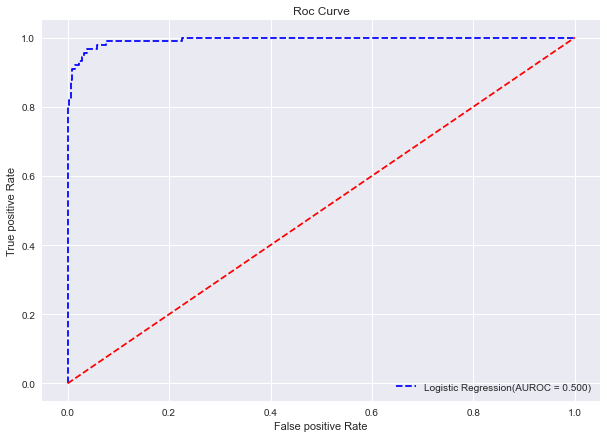

In [24]:
plt.figure(figsize=(10,7))
plt.style.use('seaborn')
plt.plot(lr_fpr, lr_tpr, linestyle='--', color='blue', label='Logistic Regression(AUROC = %.3f)' % lr_auc)
plt.plot(p_fpr, p_tpr, linestyle='--', color='red')
plt.title('Roc Curve')
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')

plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 300)
plt.show()

# Explanation

AUC - ROC curve is a performance measurement for the classification problems at various threshold settings.
ROC is a probability curve and AUC represents the degree or measure of separability.
It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0s as 0s and 1s as 1s.
An excellent model has AUC near to the 1 which means it has a good measure of separability. 
This model is better